# Similar restaurants

In the last exercise, you generated pairs between `restaurants` and `restaurants_new` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in `pairs`, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column. Both DataFrames, `pandas` and `recordlinkage` are in your environment.

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from thefuzz import fuzz
import recordlinkage

fake = Faker()
path=r'Z:/'
file='restaurants_L2.csv'
restaurants = pd.read_csv(path+file,index_col = [0]) #,parse_dates=['birth_date']
#acct_cur = [fake.random_element(elements=('dollar', 'euro')) for _ in range(len(banking))]
#banking['acct_cur']=acct_cur
restaurants = restaurants.rename(columns={'name':'rest_name','addr':'rest_addr','type':'cuisine_type'})
print(restaurants.head(),'\n')

file2='restaurants_L2_dirty.csv'
restaurants_new = pd.read_csv(path+file2,index_col = [0]) #,parse_dates=['birth_date']
restaurants_new = restaurants_new.rename(columns={'name':'rest_name','addr':'rest_addr','type':'cuisine_type'})
print(restaurants_new.head(),'\n')

                   rest_name                  rest_addr         city  \
0  arnie morton's of chicago   435 s. la cienega blv .   los angeles   
1         art's delicatessen       12224 ventura blvd.   studio city   
2                  campanile       624 s. la brea ave.   los angeles   
3                      fenix    8358 sunset blvd. west     hollywood   
4         grill on the alley           9560 dayton way   los angeles   

        phone cuisine_type  
0  3102461501     american  
1  8187621221     american  
2  2139381447     american  
3  2138486677     american  
4  3102760615     american   

  rest_name                 rest_addr         city       phone  cuisine_type
0    kokomo         6333 w. third st.           la  2139330773      american
1    feenix   8358 sunset blvd. west     hollywood  2138486677      american
2   parkway      510 s. arroyo pkwy .     pasadena  8187951001   californian
3      r-23          923 e. third st.  los angeles  2136877178      japanese
4     

In [11]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block(['cuisine_type'])

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

* Instantiate a comparison object using the `recordlinkage.Compare()` function.

In [12]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

* Use the appropriate `comp_cl` method to find exact matches between the `city` and `cuisine_type` columns of both DataFrames.
* Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the rest_name column of both DataFrames.


In [13]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label = 'cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold= 0.8) 

<Compare>

Compute the comparison of the pairs by using the .compute() method of comp_cl

In [14]:
# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


Question

Print out `potential_matches`, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with 

```python
potential_matches[potential_matches.sum(axis = 1) >= n]
```
Where n is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of n be?

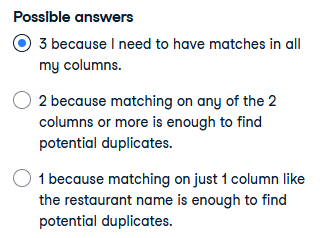

In [15]:
print(potential_matches[potential_matches.sum(axis = 1) >= 3])

       city  cuisine_type  name
0  40     1             1   1.0
1  28     1             1   1.0
2  74     1             1   1.0
3  1      1             1   1.0
4  53     1             1   1.0
8  43     1             1   1.0
9  50     1             1   1.0
13 7      1             1   1.0
14 67     1             1   1.0
17 12     1             1   1.0
20 20     1             1   1.0
21 27     1             1   1.0
5  65     1             1   1.0
7  79     1             1   1.0
12 26     1             1   1.0
18 71     1             1   1.0
6  73     1             1   1.0
10 75     1             1   1.0
11 21     1             1   1.0
16 57     1             1   1.0
19 47     1             1   1.0
15 55     1             1   1.0
